<a href="https://colab.research.google.com/github/wendywqz/GenAI/blob/main/Implementing_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy pandas scikit-learn matplotlib

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

NumPy and pandas will help us handle numerical and tabular data.

Scikit-learn's LogisticRegression will be used to build the model.

Matplotlib will allow us to visualize the results.

In [9]:
# Sample dataset: Study hours and whether sutdents passed or failed
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'PasS': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1] # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
df.head()

,StudyHours,PasS
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


## **Splitting the data into training and testing sets**

In [11]:
# Features (X) and Target (y)
X = df[['StudyHours']]  # Feature(s)
y = df['PasS']          # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)


test_size=0.2: This determines the proportion of the dataset that should be allocated to the testing set. In this case, 0.2 means that 20% of the data will be used for testing, and the remaining 80% will be used for training.

random_state=42: This ensures that the data is split in a reproducible way. By setting a specific number (42 in this case), you guarantee that the split will be the same every time you run the code. This is important for comparing results across different runs. If you don't set a random_state, the split will be random each time, making it difficult to track changes and improvements.

Imagine you have 100 students' data. test_size=0.2 means you'll randomly pick 20 students' data for testing the model's performance, and the remaining 80 students' data will be used to train the model. random_state=42 makes sure that if you re-run the code, the same 20 students will always be picked for testing, making your results consistent.

## **Training the logistic regression model**

In [13]:
# Initialized the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's learned coefficients
print(f"Model Coefficients: {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [1.14270903]
Model Intercept: [-6.28495636]


##**Making predictions**

In [14]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]


##**Evaluate the model**

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Accuracy: The percentage of correctly predicted outcomes out of all predictions

Confusion matrix: A table that shows the number of correct and incorrect predictions categorized by true positives, true negatives, false positives, and false negatives

Classification report: A report that provides detailed metrics such as precision, recall, and F1 score for each class

##**Visualize the results**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


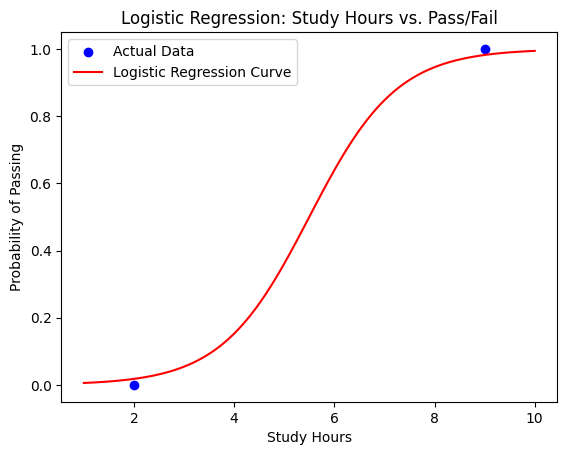

In [18]:
# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid function
y_prob = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the logistic regression curve
plt.plot(study_hours_range, y_prob, color='red', label='Logistic Regression Curve')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Study Hours vs. Pass/Fail')
plt.legend()

# Show the plot
plt.show()